## Color Classification
> In this example we are going to classify different colors. Unlike from the previous example, our data has more colors and these colors are not numeric

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [4]:
x_test = test_data.x.values
x_train = train_data.x.values

y_test = test_data.y.values
y_train = train_data.y.values

color_train = train_data.color.values
color_test = test_data.color.values

In [5]:
x_test.shape, x_train.shape, color_train.shape, y_test.shape

((1200,), (6000,), (6000,), (1200,))

> Change `colors` to to numbers

In [7]:
colors_dict = {'red': 0, 'blue': 1, 'green': 2, 'teal': 3, 'orange': 4, 'purple': 5}

In [8]:
color_train_numbers = np.array([colors_dict[i] for i in color_train])
color_test_numbers = np.array([colors_dict[i] for i in color_test])

In [13]:
train = np.column_stack([np.column_stack([x_train, y_train]), color_train_numbers])
test = np.column_stack([np.column_stack([x_test, y_test]), color_test_numbers])
np.random.shuffle(train)
np.random.shuffle(test)
train

array([[-0.45565445,  4.90063262,  1.        ],
       [ 0.30010213,  4.24862721,  1.        ],
       [-1.76754438,  4.33501796,  3.        ],
       ...,
       [ 0.04320052,  1.11982577,  0.        ],
       [-2.63266884,  2.48812105,  4.        ],
       [ 0.25889792,  3.12607146,  5.        ]])

In [17]:
X_train = train[:, :2]
X_test = test[:, :2]
y_train = train[:, -1]
y_test = test[:, -1]

### Visualisation
> Visualising the train data.

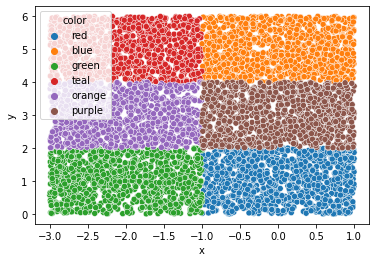

In [19]:
sns.scatterplot(data=train_data, x='x', y='y', hue='color')
plt.show()

### Model Creation

In [44]:
model = keras.Sequential([
    keras.layers.Dense(16, input_shape=(2, ), activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(6, activation='softmax'),
])

In [45]:
model.compile(
    optimizer = keras.optimizers.Adam(lr= 0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [48]:
model.fit(X_train, y_train, epochs=10, batch_size=6)

Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0413 - accuracy: 0.9848
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0413 - accuracy: 0.9872
Epoch 3/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0457 - accuracy: 0.9845
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0429 - accuracy: 0.9847
Epoch 5/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0437 - accuracy: 0.9832
Epoch 6/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0423 - accuracy: 0.9850
Epoch 7/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0443 - accuracy: 0.9850
Epoch 8/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0431 - accuracy: 0.9825
Epoch 9/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0421 - accuracy: 0.9830
Epoch 10/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.039

In [49]:
model.evaluate(X_test, y_test)

38/38 [==============================] - 0s 1ms/step - loss: 0.0356 - accuracy: 0.9858


[0.03559964522719383, 0.9858333468437195]

### Making Predictions

In [56]:
colors = list(colors_dict.keys())

In [60]:
i = np.argmax(model.predict([[0, 5]]))
colors[i]

'blue'